## Importing necessary libraries.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import os

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)


## Data Gathering

In [3]:
df = pd.read_csv(r"E:\Data-py\VVV\raw__data__raw\data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#Checking the summary statistics of the object attribute 'diagnosis'.
df.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


In [11]:
#Checking the summary statistics of the numeric attributes.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Feature Engineering

In [8]:
#all null
df.drop("Unnamed: 32", axis=1, inplace = True)

In [9]:
#dropping id column as it is not important
df.drop("id",axis = 1, inplace = True)

In [13]:
#object
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [14]:
df["diagnosis"].value_counts().to_dict()

{'B': 357, 'M': 212}

In [15]:
df["diagnosis"].replace({'B': 0, 'M': 1},inplace = True)

In [17]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

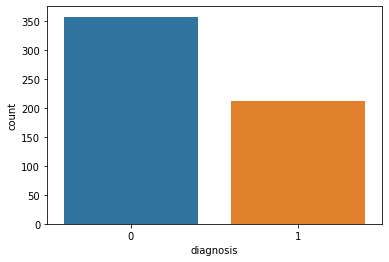

In [24]:
#Visualizing the count of values in diagnosis variable.

sns.countplot(df["diagnosis"])
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='Density'>

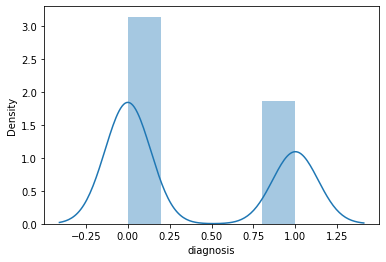

In [29]:
#Checking the distribution of the variable 'diagnosis.'

sns.distplot(df["diagnosis"])

In [30]:
df.shape

(569, 31)

In [41]:
#Nucleus features vs diagnosis
features_mean=list(df.columns[1:11])

In [31]:
# split dataframe into two based on diagnosis
cancer_M = df[df['diagnosis'] == 1]
cancer_B = df[df['diagnosis'] == 0]

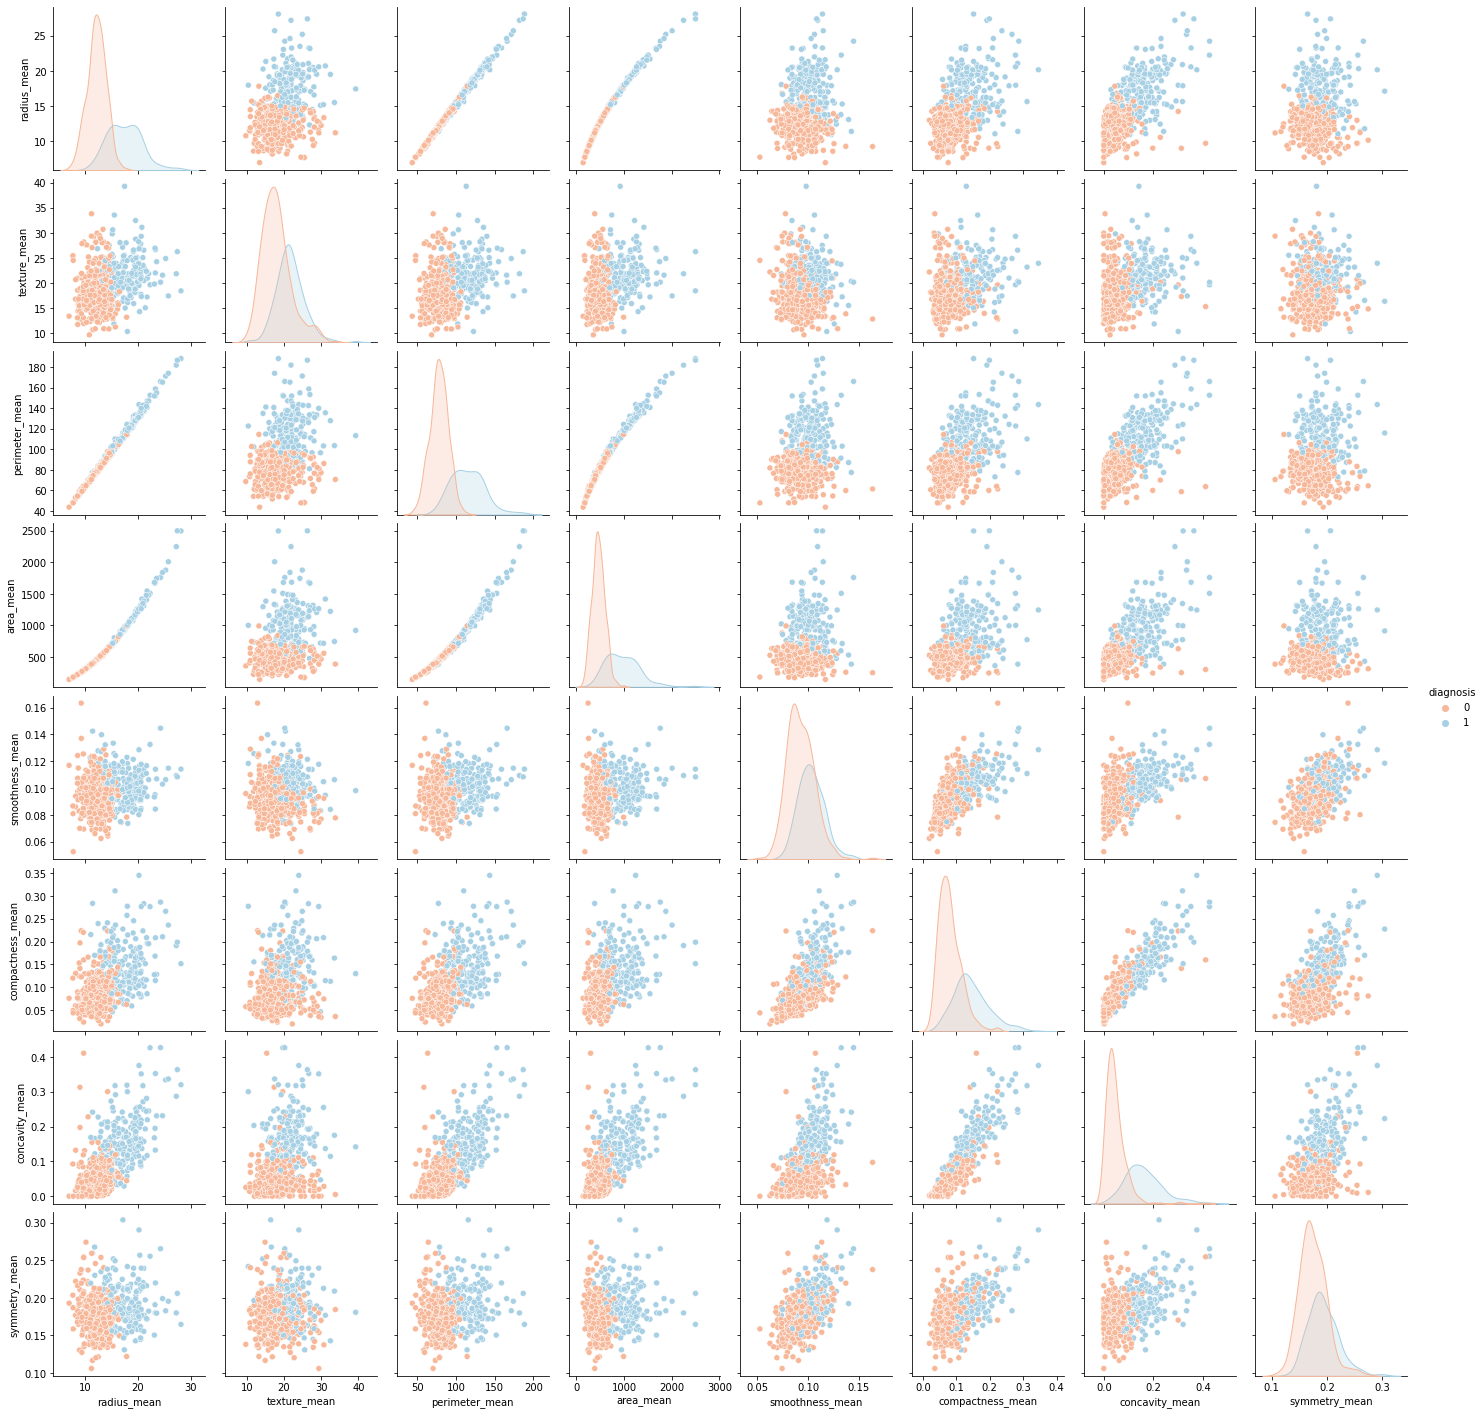

In [33]:
#Genrating a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean', 
        'symmetry_mean']

sns.pairplot(data = df[cols], hue = 'diagnosis', palette = 'RdBu')

There are almost perfectly linear patterns between the radius, perimeter and area attributes which hint at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_l = []
for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.values,i)
    vif_l.append(round(vif,2))
    

    
a = pd.DataFrame(vif_l,index=df.columns, columns=["VIF"])
a.sort_values("VIF",ascending= False)

,VIF
radius_mean,63787.23
perimeter_mean,58217.31
radius_worst,9960.89
perimeter_worst,4494.53
area_mean,1305.51
area_worst,1164.09
fractal_dimension_mean,654.87
fractal_dimension_worst,427.23
smoothness_mean,393.41
smoothness_worst,375.60


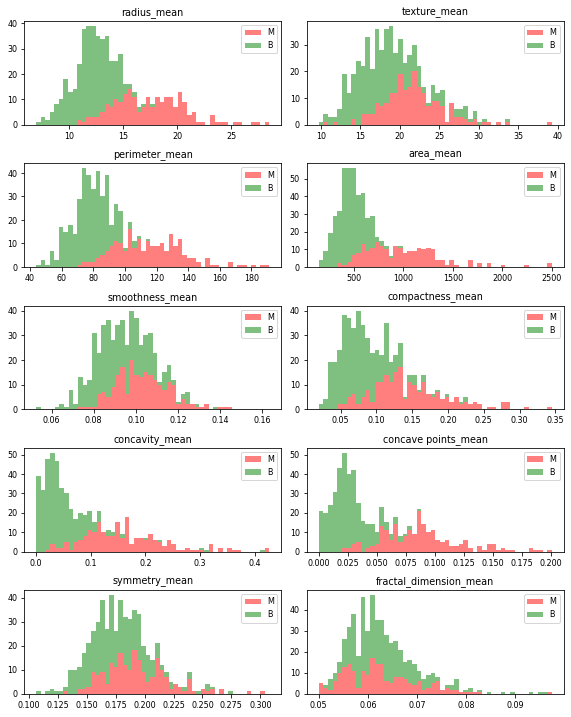

In [45]:
#Stacking the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([cancer_M[features_mean[idx]],cancer_B[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), \
                        max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, 
                        label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

Here we can see the mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors. Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the above histograms there are no noticeable large outliers that requires further cleanup.

### Building the logistic model with all the attributes.

In [47]:
x = df.iloc[:,1:31]
y = df["diagnosis"]

In [48]:
#split the data

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=11)

In [49]:
#Displaying all the columns.
pd.options.display.max_columns = None
x_train.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,0.05914,0.2505,1.0250,1.740,19.68,0.004854,0.01819,0.01826,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.08660,0.2618,0.07609
456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,0.3135,2.4260,2.150,23.13,0.009861,0.02418,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220


In [50]:
#Creating an instance of logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model1 = LogisticRegression()

#We fit our model to data
fitted_model1 = logistic_model1.fit(x_train,y_train)

#We use predict_proba() to predict the probabilities
predictedvalues1 = fitted_model1.predict(x_test)

#We print the probabilites to take a glance
print(predictedvalues1)

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 1 0 1]


In [51]:
#Checking the accuracy of the above model.
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logistic_model1.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.939


In [52]:
#Generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,predictedvalues1)
print(confusion_matrix1)

[[74  2]
 [ 5 33]]


<AxesSubplot:>

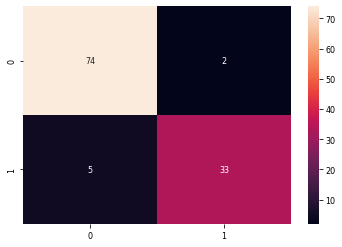

In [54]:
sns.heatmap(confusion_matrix1, annot= True)

In [55]:
#Calculating sensitivity and specificity
total=sum(sum(confusion_matrix1))

sensitivity1 = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix1[1,1]/(confusion_matrix1[1,1]+confusion_matrix1[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9367088607594937
Specificity :  0.9428571428571428


Area under the curve: 0.921


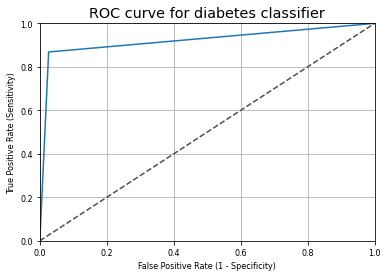

In [56]:
#Generating the roc and calculating the auc.
fpr, tpr, thresholds = roc_curve(y_test, predictedvalues1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area under the curve: {:.3f}".format(auc(fpr,tpr)))

In [57]:
#Generating the classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedvalues1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.94      0.87      0.90        38

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



<AxesSubplot:>

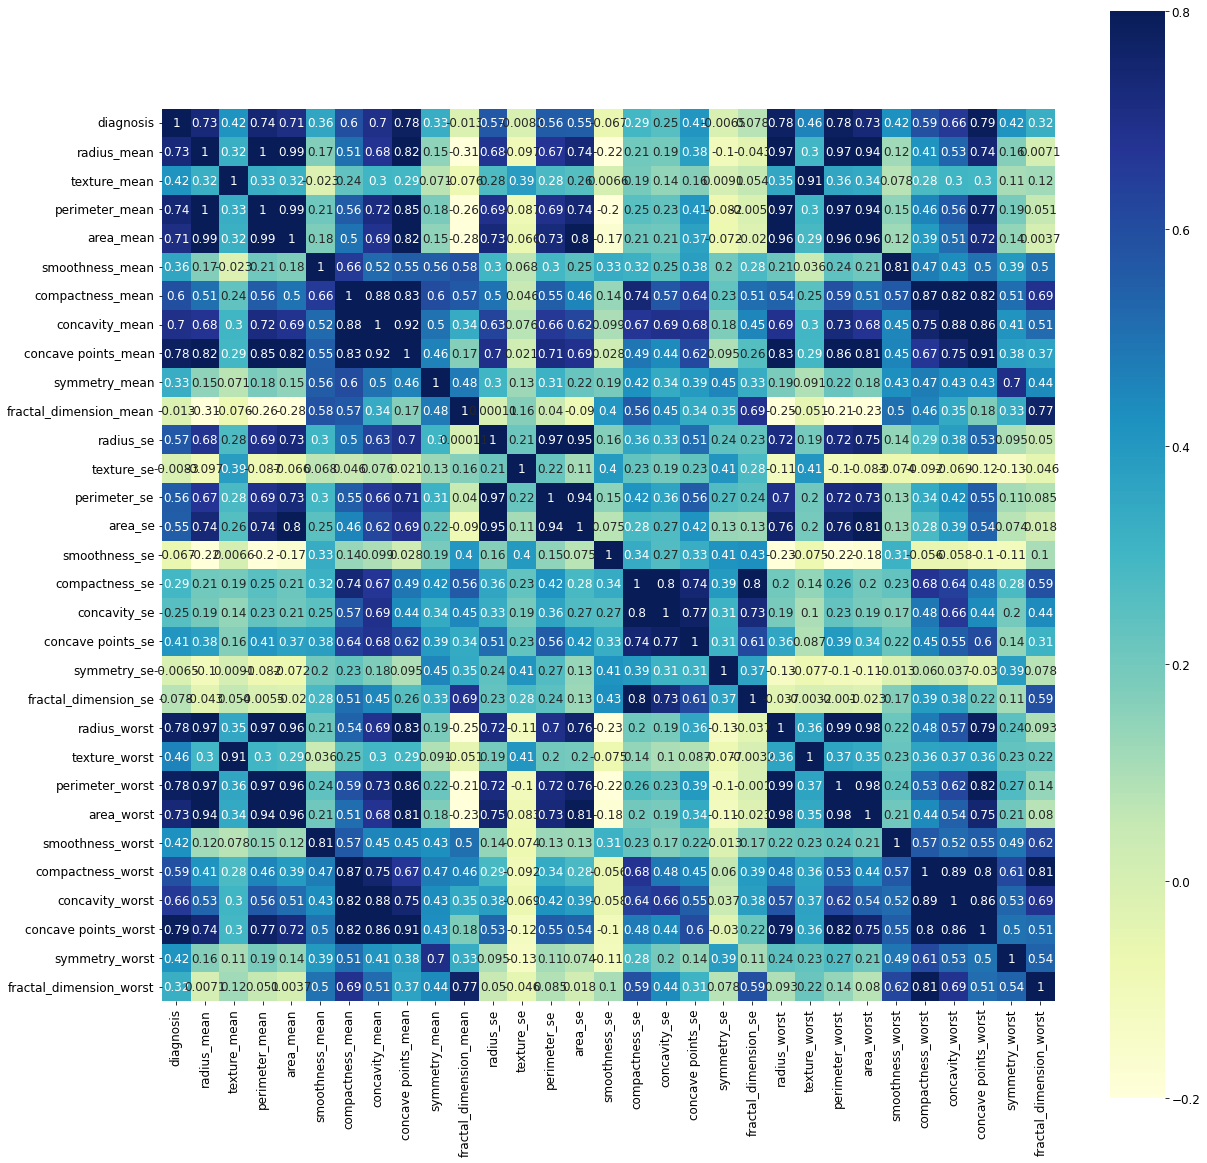

In [59]:
#Generating the correlation matrix.
fig, ax=plt.subplots(figsize=(20,20))
correlation=df.corr()
sns.heatmap(correlation,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu", annot=True)

As seen in the heatmap above- radius_mean, perimeter_mean, texture_mean, area_mean, radius_worst, perimeter_worst are highly correlated.

Also here we can see that there is multicollinearity between "mean" columns and the "worst" column. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This shows that the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we can discard the "worst" columns from our analysis and only focus on the "mean" columns.

So here we will drop all "worst" columns from the dataset, and pick only one of the three attributes that describe the size of cells.

Since a cell's radius is the basic building block of its size. Therefore, it is reasonable to choose radius as our attribute to represent the size of a cell.

Also there is multicollinearity between the attributes compactness, concavity. So similarly what we did with the size attributes, here also we should pick only one of these three attributes that contain information on the shape of the cell. So we will take compactness attribute as it somewhat describes the size of the cell, and remove the other attribute.

#### So now we will remove the unnecessary columns

In [60]:
#Dropping all "worst" columns. 
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst', 
        'symmetry_worst']      
df = df.drop(cols, axis = 1)

In [61]:
#Dropping the perimeter and area attributes.
cols1 = ['area_se', 'perimeter_se', 'perimeter_mean', 'area_mean']
df = df.drop(cols1, axis = 1)

In [62]:
#Dropping the concavity attributes.
cols2 = ['concavity_mean', 'concavity_se']
df = df.drop(cols2, axis = 1)

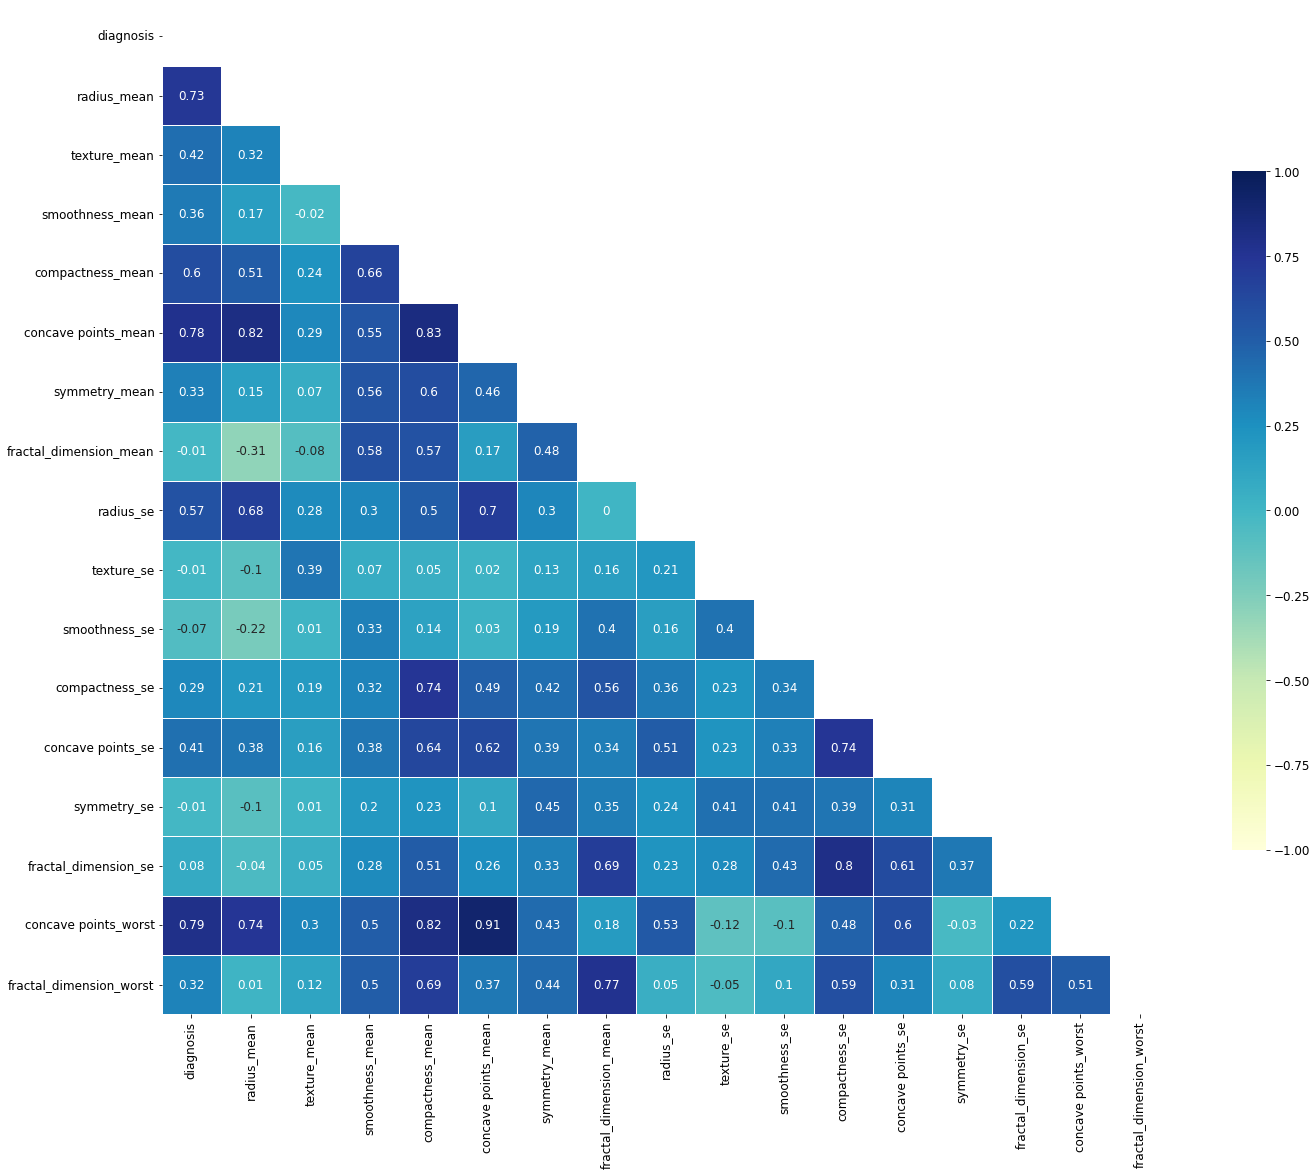

In [64]:
#Drawing the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

## Rebuilding the logistic regression model.

In [65]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [66]:
x_train.shape, x_test.shape, y_test.shape

((455, 16), (114, 16), (114,))

In [67]:
#Displaying all the columns.
pd.options.display.max_columns = None
x_train.head(3)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,concave points_worst,fractal_dimension_worst
412,9.397,21.68,0.07969,0.06053,0.005128,0.1274,0.06724,0.1186,1.1820,0.005515,0.026740,0.005128,0.01951,0.004583,0.02564,0.09206
461,27.420,26.27,0.10840,0.19880,0.168900,0.2061,0.05623,2.5470,1.3060,0.007650,0.053740,0.025980,0.01697,0.004558,0.26250,0.07427
532,13.680,16.33,0.09277,0.07255,0.018800,0.1631,0.06155,0.2047,0.4801,0.003828,0.007228,0.005077,0.01054,0.001697,0.08704,0.07782


In [68]:
#Creating an instance of logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model2 = LogisticRegression()

#Fitting our model to data
fitted_model2 = logistic_model2.fit(x_train,y_train)

#We use predict_proba() to predict the probabilities
predictedvalues2 = fitted_model2.predict(x_test)

#We print the probabilites to take a glance
print(predictedvalues2)

[0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0]


In [69]:
#Checking the accuracy of the above model.
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logistic_model2.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.912


In [70]:
#Generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,predictedvalues2)
print(confusion_matrix2)

[[63  3]
 [ 7 41]]


<AxesSubplot:>

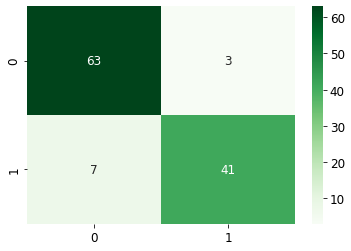

In [73]:
sns.heatmap(confusion_matrix2,annot = True, cmap = "Greens")

In [74]:
#Calculating sensitivity and specificity
total=sum(sum(confusion_matrix1))

sensitivity2 = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity2 )

specificity2 = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity2)

Sensitivity :  0.9
Specificity :  0.9318181818181818


Area under the curve: 0.904


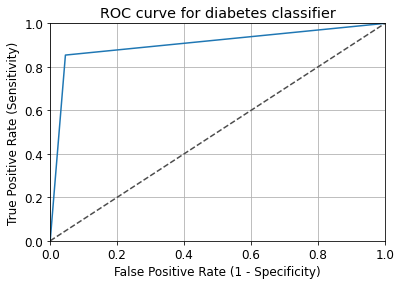

In [75]:
#Generating the roc and calculating the auc.
fpr, tpr, thresholds = roc_curve(y_test, predictedvalues2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area under the curve: {:.3f}".format(auc(fpr,tpr)))

In [76]:
#Generating the classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedvalues2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        66
           1       0.93      0.85      0.89        48

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



Here we can see after eliminating the multicollinear attributes the accuracy reduced as well as the AUC dropped from 0.945 to 0.909

____________________________________

_______________________________________


_________________________________________________________